In [1]:
import numpy as np 
import pandas as pd 
import requests


# Covid19 Cases per counties: 10 counties per top top ten states.

In [2]:
county_covid19_data= pd.read_csv('covid19_top10.csv', index_col=0)
county_covid19_data.rename(columns= {'State': 'STATE'}, inplace= True)
print(county_covid19_data.shape)
county_covid19_data.head(3)


(100, 3)


,County,cases,STATE
0,Los Angeles County,536258.0,CA
1,San Bernardino County,137548.0,CA
2,Riverside County,131822.0,CA


# Counties with respective Cities and GEOID's

In [3]:
places_df= pd.read_csv('census_national_places_counties1.txt', delimiter= '|', dtype= object, )
places_df.head(3)

,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,COUNTY
0,AL,01,00100,Abanda CDP,Census Designated Place,S,Chambers County
1,AL,01,00124,Abbeville city,Incorporated Place,A,Henry County
2,AL,01,00460,Adamsville city,Incorporated Place,A,Jefferson County


In [4]:
places_df1= places_df
places_df1.rename(columns={'COUNTY': 'County'}, inplace= True)


for i in places_df1:
    places_df1['GEOID']= places_df1['STATEFP'] + places_df1['PLACEFP']

print(places_df1.shape)
places_df1.head()

(41414, 8)


,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,County,GEOID
0,AL,01,00100,Abanda CDP,Census Designated Place,S,Chambers County,0100100
1,AL,01,00124,Abbeville city,Incorporated Place,A,Henry County,0100124
2,AL,01,00460,Adamsville city,Incorporated Place,A,Jefferson County,0100460
3,AL,01,00484,Addison town,Incorporated Place,A,Winston County,0100484
4,AL,01,00676,Akron town,Incorporated Place,A,Hale County,0100676


# Census Population Estimates

In [5]:
my_dic= {'STATE': object, 'COUNTY': object,'PLACE': object}
pop_est= pd.read_csv('Population_Es (1).csv', usecols= {'SUMLEV', 'STATE', 'COUNTY', 'PLACE', 'COUSUB', 'CONCIT', 'FUNCSTAT', 'NAME', 'STNAME', 'POPESTIMATE2019'}, dtype= my_dic)


# Creates a list of index where Place== 0, and County not equal to 0. Meaning any value that is not a city/town 

a= pop_est[pop_est['PLACE']== '0'].index
b= pop_est[pop_est['COUNTY']!= '0'].index


index_values= list(a)+ list(b)
index_values= list(dict.fromkeys(index_values))

pop_est_df= pop_est.drop(index= index_values)

print(pop_est_df.shape)
pop_est_df.head()

(19617, 10)


,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,FUNCSTAT,NAME,STNAME,POPESTIMATE2019
1,162,1,0,124,0,0,A,Abbeville city,Alabama,2560
2,162,1,0,460,0,0,A,Adamsville city,Alabama,4281
3,162,1,0,484,0,0,A,Addison town,Alabama,718
4,162,1,0,676,0,0,A,Akron town,Alabama,328
5,162,1,0,820,0,0,A,Alabaster city,Alabama,33487


# Creating a column to have uniform GEOIDS accross datasets

In [6]:
new_state= []
new_cty= []

for i in pop_est_df['STATE']:                       
    if len (i)< 2:
        nv='0'+ i
    else:
        nv= i


    new_state.append(nv)
    
pop_est_df['STATEFP']= new_state

for j in pop_est_df['PLACE']:
    if len(j) <5:
        dif=(5-len(j)) * '0'
        n=dif+j
        
    else:
        n= j
        
       
    new_cty.append(n)
        
pop_est_df['PLACEFP']= new_cty
pop_est_df['GEOID']=pop_est_df['STATEFP'] + pop_est_df['PLACEFP']
print(pop_est_df.shape)
pop_est_df.tail(3)       

(19617, 13)


,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,FUNCSTAT,NAME,STNAME,POPESTIMATE2019,STATEFP,PLACEFP,GEOID
81285,162,56,0,84925,0,0,A,Worland city,Wyoming,5024,56,84925,5684925
81286,162,56,0,85015,0,0,A,Wright town,Wyoming,1753,56,85015,5685015
81287,162,56,0,86665,0,0,A,Yoder town,Wyoming,154,56,86665,5686665


In [7]:
pop_est_df1= pop_est_df.drop_duplicates(subset= 'GEOID' , keep='first')
print(pop_est_df1.shape)

(19502, 13)


# Merging Covid19 Dataset with Counties and their cities Dataset

In [8]:
counties_df= pd.merge(county_covid19_data, places_df1, on= ['STATE', 'County'])
print(counties_df.shape)
counties_df.tail()

(4144, 9)


,County,cases,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,GEOID
4139,Monroe County,25643.0,NY,36,70189,Spencerport village,Incorporated Place,A,3670189
4140,Monroe County,25643.0,NY,36,72455,Sweden town,County Subdivision,A,3672455
4141,Monroe County,25643.0,NY,36,78960,Webster village,Incorporated Place,A,3678960
4142,Monroe County,25643.0,NY,36,78971,Webster town,County Subdivision,A,3678971
4143,Monroe County,25643.0,NY,36,81402,Wheatland town,County Subdivision,A,3681402


# Remove duplicates after merging Covid19 dataframe and Dataframe with cities and counties

In [9]:
ccs= counties_df
ccs= ccs.drop_duplicates(subset= 'GEOID', keep='first')
print(ccs.shape)
ccs.head()


(3632, 9)


,County,cases,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,GEOID
0,Los Angeles County,536258.0,CA,06,00212,Acton CDP,Census Designated Place,S,0600212
1,Los Angeles County,536258.0,CA,06,00394,Agoura Hills city,Incorporated Place,A,0600394
2,Los Angeles County,536258.0,CA,06,00450,Agua Dulce CDP,Census Designated Place,S,0600450
3,Los Angeles County,536258.0,CA,06,00884,Alhambra city,Incorporated Place,A,0600884
4,Los Angeles County,536258.0,CA,06,01150,Alondra Park CDP,Census Designated Place,S,0601150


In [10]:
ccs['TYPE'].value_counts()

County Subdivision         1247
Incorporated Place         1205
Census Designated Place    1180
Name: TYPE, dtype: int64

# Drop Census Designated Places: 
### the statistical counterparts of incorporated places, and are delineated to provide data for settled concentrations of population that are identifiable by name but are not legally incorporated.

In [11]:
ccs_df= (ccs[ccs['TYPE']!= 'Census Designated Place']).reset_index(drop= True)
ccs_df.drop(index=ccs_df[ccs_df['PLACENAME']== 'County Subdivisions not defined'].index, inplace= True)
print(ccs_df.shape)

(2449, 9)


# Merging Datasets with Cities and their populations with Dataset of Covid and Cities

In [12]:
result= pd.merge(ccs_df, pop_est_df1, on= 'GEOID')
print(result.shape)
result.head(3)

(1710, 21)


,County,cases,STATE_x,STATEFP_x,PLACEFP_x,PLACENAME,TYPE,FUNCSTAT_x,GEOID,SUMLEV,...,COUNTY,PLACE,COUSUB,CONCIT,FUNCSTAT_y,NAME,STNAME,POPESTIMATE2019,STATEFP_y,PLACEFP_y
0,Los Angeles County,536258.0,CA,06,00394,Agoura Hills city,Incorporated Place,A,0600394,162,...,0,394,0,0,A,Agoura Hills city,California,20222,06,00394
1,Los Angeles County,536258.0,CA,06,00884,Alhambra city,Incorporated Place,A,0600884,162,...,0,884,0,0,A,Alhambra city,California,83750,06,00884
2,Los Angeles County,536258.0,CA,06,02462,Arcadia city,Incorporated Place,A,0602462,162,...,0,2462,0,0,A,Arcadia city,California,57939,06,02462


In [13]:
result_df= result.drop(columns= {'STATE_x', 'STATEFP_x', 'PLACEFP_x', 'PLACENAME', 'SUMLEV', 'COUSUB', 'CONCIT', 'FUNCSTAT_y','STATEFP_y', 'PLACEFP_y', 'COUNTY', 'FUNCSTAT_x', 'STATE_y','PLACE'})


In [14]:
result_df= result_df[['NAME', 'County', 'STNAME','TYPE','GEOID', 'POPESTIMATE2019', 'cases', ]]

result_df.head(3)

,NAME,County,STNAME,TYPE,GEOID,POPESTIMATE2019,cases
0,Agoura Hills city,Los Angeles County,California,Incorporated Place,0600394,20222,536258.0
1,Alhambra city,Los Angeles County,California,Incorporated Place,0600884,83750,536258.0
2,Arcadia city,Los Angeles County,California,Incorporated Place,0602462,57939,536258.0


# Add Dataset with city Latitude and Longitude

In [15]:
my_dict= {'GEOID': object}
coords= pd.read_csv('Places_cities_coordinates.txt',delimiter= '\t',encoding= 'utf-8', dtype= my_dict )
coords.drop(columns=['ANSICODE', 'LSAD', 'FUNCSTAT', 'ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI'], inplace= True)
coords.shape

(29574, 5)

In [16]:
coords.rename(columns={'INTPTLAT': 'LAT', 'INTPTLONG                                                                                                 ':'LONG'}, inplace= True)
# coords['LONG']= (coords['LONG'])*-1


# Merging results dataframe with Census Latitude and Longitude dataframe

In [17]:
results_df= pd.merge(result_df, coords, on=['GEOID'])
print(results_df.shape)
results_df.head()

(1710, 11)


,NAME_x,County,STNAME,TYPE,GEOID,POPESTIMATE2019,cases,USPS,NAME_y,LAT,LONG
0,Agoura Hills city,Los Angeles County,California,Incorporated Place,0600394,20222,536258.0,CA,Agoura Hills city,34.148942,-118.763930
1,Alhambra city,Los Angeles County,California,Incorporated Place,0600884,83750,536258.0,CA,Alhambra city,34.083571,-118.136444
2,Arcadia city,Los Angeles County,California,Incorporated Place,0602462,57939,536258.0,CA,Arcadia city,34.132689,-118.036347
3,Artesia city,Los Angeles County,California,Incorporated Place,0602896,16601,536258.0,CA,Artesia city,33.867593,-118.080635
4,Avalon city,Los Angeles County,California,Incorporated Place,0603274,3681,536258.0,CA,Avalon city,33.343335,-118.317615


In [18]:
results_df.rename(columns={'NAME_y': 'NAME', 'USPS': 'STATE'}, inplace= True)
results_df=results_df[['NAME', 'County', 'STNAME', 'STATE', 'TYPE', 'GEOID', 'POPESTIMATE2019', 'cases', 'LAT', 'LONG']]
results_df.shape

(1710, 10)

In [19]:
results_df.head(2)

,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG
0,Agoura Hills city,Los Angeles County,California,CA,Incorporated Place,0600394,20222,536258.0,34.148942,-118.763930
1,Alhambra city,Los Angeles County,California,CA,Incorporated Place,0600884,83750,536258.0,34.083571,-118.136444


In [140]:
sorted_df= results_df.sort_values(by= ['STATE', 'cases', 'POPESTIMATE2019'],ascending= False, ignore_index= True)

sorted_df.head(3)

,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG
0,West Allis city,Milwaukee County,Wisconsin,WI,County Subdivision,5585300,59890,79396.0,43.007186,-88.028986
1,Wauwatosa city,Milwaukee County,Wisconsin,WI,County Subdivision,5584675,48118,79396.0,43.063165,-88.035583
2,Greenfield city,Milwaukee County,Wisconsin,WI,County Subdivision,5531175,37221,79396.0,42.960604,-88.005670


# New dataset containing top 6 rows with highest cases and population per county

In [141]:
grouped= sorted_df.groupby(['STATE', 'County'])
df1=grouped.head(6)
df1.reset_index(drop=True, inplace= True)
df1.head()


,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG
0,West Allis city,Milwaukee County,Wisconsin,WI,County Subdivision,5585300,59890,79396.0,43.007186,-88.028986
1,Wauwatosa city,Milwaukee County,Wisconsin,WI,County Subdivision,5584675,48118,79396.0,43.063165,-88.035583
2,Greenfield city,Milwaukee County,Wisconsin,WI,County Subdivision,5531175,37221,79396.0,42.960604,-88.005670
3,Oak Creek city,Milwaukee County,Wisconsin,WI,County Subdivision,5558800,36325,79396.0,42.880257,-87.900777
4,Franklin city,Milwaukee County,Wisconsin,WI,County Subdivision,5527300,35811,79396.0,42.883879,-88.011548


In [142]:
df1.shape

(513, 10)

In [143]:
cities_list= df1['NAME']+ df1['STNAME']
cities_list_csv= cities_list.to_csv('cities_list', index= False)


In [24]:
hhs_df= pd.read_csv('householdSize.csv', dtype= object)
hhs_df.rename(columns= {'FIPS': 'GEOID'}, inplace= True)
hhs_df.head()

,GEOID,Persons per Household
0,5585300,2.17
1,5584675,2.33
2,5531175,2.18
3,5558800,2.45
4,5527300,2.44


In [144]:
print(df1.shape)
hhs_df.shape

(513, 10)


(513, 2)

## Merging Household averaze size/Persons per Household datawith df1 which contains top values Covid-19 cases as well as population per county per state

In [146]:
df2= pd.merge(df1, hhs_df, on=['GEOID'])
print(df2.shape)
df2.head(3)

(447, 11)


,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household
0,West Allis city,Milwaukee County,Wisconsin,WI,County Subdivision,5585300,59890,79396.0,43.007186,-88.028986,2.17
1,Wauwatosa city,Milwaukee County,Wisconsin,WI,County Subdivision,5584675,48118,79396.0,43.063165,-88.035583,2.33
2,Greenfield city,Milwaukee County,Wisconsin,WI,County Subdivision,5531175,37221,79396.0,42.960604,-88.005670,2.18


In [147]:
df2['STATE'].value_counts()

CA    60
TX    53
OH    49
PA    47
IL    47
WI    47
MI    39
FL    38
GA    37
NY    30
Name: STATE, dtype: int64

## When merging df1 and hhs_df we lose 4 rows. The reason for this  is because when webscraping census data there were 4 cities that did not return any value. Not present in the data

In [148]:
df2[df2.isna().any(axis=1)]        # This line finds rows with NaN values. I saw it when I did outer merge. 

,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household


# Analysis with folium and Four Square

In [29]:
import numpy as np 
import matplotlib.cm as cm 
import matplotlib.colors as colors 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
import folium 
import geocoder 

In [30]:
address = 'United States'

geolocator = Nominatim(user_agent="to_explore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of United States are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of United States are 39.7837304, -100.4458825.


In [31]:
# create map of US using latitude and longitude values
map_US = folium.Map(location=[latitude,longitude], zoom_start=4)

# add markers to map
for LAT,LONG, NAME, STATE in zip(df2['LAT'], df2['LONG'], df2['NAME'], df2['STATE']):
    label = '{}, {}'.format(NAME,  STATE)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [LAT,LONG],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US)  
    
map_US

# Four Square Credentials

In [32]:
# Four Square Credentials 


CLIENT_ID= #Client Id Number

CLIENT_SECRET= # Client Secret Number

VERSION = '20180605' # Foursquare API version
LIMIT = 550 # A default Foursquare API limit 



## EXPLORING Comunities/Cities most affected by Covid-19

In [33]:


def getNearbyVenues(NAME, LAT, LONG, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(NAME, LAT, LONG):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        out = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in out])


# Create dataframe        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
venue_list= getNearbyVenues(NAME=df2['NAME'], LAT=df2['LAT'], LONG=df2['LONG'])

West Allis city
Wauwatosa city
Greenfield city
Oak Creek city
Franklin city
South Milwaukee city
Waukesha city
New Berlin city
Brookfield city
Menomonee Falls village
Muskego city
Oconomowoc city
Madison city
Sun Prairie city
Fitchburg city
Middleton city
Waunakee village
Verona city
Green Bay city
Green Bay city
Ashwaubenon village
Bellevue village
Allouez village
Suamico village
Racine city
Racine city
Caledonia village
Sturtevant village
Waterford village
Kaukauna city
Little Chute village
Kimberly village
Kimberly village
Oshkosh city
Neenah city
Kenosha city
Pleasant Prairie village
Twin Lakes village
Bristol village
Janesville city
Beloit city
Milton city
Evansville city
Wausau city
Weston village
Kronenwetter village
Kronenwetter village
Pasadena city
La Porte city
Deer Park city
Bellaire city
South Houston city
Humble city
Irving city
DeSoto city
Farmers Branch city
Lancaster city
Duncanville city
Balch Springs city
Arlington city
North Richland Hills city
Euless city
Bedford c

In [35]:
print(venue_list.shape)
venue_list.head()

(3672, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West Allis city,43.007186,-88.028986,Chef Paz Restaurant,43.005368,-88.025799,Peruvian Restaurant
1,West Allis city,43.007186,-88.028986,Scooter's Tap,43.006135,-88.025220,Bar
2,West Allis city,43.007186,-88.028986,Fourth-N-Long,43.006532,-88.023911,Sports Bar
3,West Allis city,43.007186,-88.028986,J.Beans Pub,43.005606,-88.025669,Pub
4,West Allis city,43.007186,-88.028986,Speedway,43.005200,-88.026330,Gas Station


In [36]:
venue_list.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Acworth city,6,6,6,6,6,6
Addison village,5,5,5,5,5,5
Akron city,31,31,31,31,31,31
Allen city,5,5,5,5,5,5
Allentown city,3,3,3,3,3,3
...,...,...,...,...,...,...
Yeadon borough,2,2,2,2,2,2
Yonkers city,16,16,16,16,16,16
York city,41,41,41,41,41,41


In [37]:
print('There are {} uniques categories.'.format(len(venue_list['Venue Category'].unique())))

There are 351 uniques categories.


In [38]:
# Analyze each city

# one hot encoding
onehot_df = pd.get_dummies(venue_list[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot_df['City'] = venue_list['City'] 

# move neighborhood column to the first column
# Rearrange columns order

cols = list(onehot_df.columns.values)
cols.remove('City')


cols.insert(0, 'City')

onehot_df=onehot_df[cols]
print(onehot_df.shape)
onehot_df.head(3)



(3672, 352)


,City,ATM,Accessories Store,Advertising Agency,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,West Allis city,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,West Allis city,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,West Allis city,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#  Frequency of occurrences by city

grouped_df = onehot_df.groupby('City').mean().reset_index()
grouped_df.head(3)

,City,ATM,Accessories Store,Advertising Agency,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Acworth city,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Addison village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Akron city,0.0,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
grouped_df.shape

(389, 352)

# Top venues

In [41]:

grouped_df['City']

0         Acworth city
1      Addison village
2           Akron city
3           Allen city
4       Allentown city
            ...       
384     Yeadon borough
385       Yonkers city
386          York city
387     Ypsilanti city
388       Zeeland city
Name: City, Length: 389, dtype: object

In [42]:
num_top_venues = 10

for c in grouped_df['City']:
    print("----"+c+"----")
    temp = grouped_df[grouped_df['City'] == c].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

nt  0.14
1             Video Store  0.07
2          Cosmetics Shop  0.03
3          Sandwich Place  0.03
4  Thrift / Vintage Store  0.03
5           Grocery Store  0.03
6                    Park  0.03
7           Shopping Mall  0.03
8             Coffee Shop  0.03
9              Food Truck  0.03


----Suwanee city----
                           venue  freq
0              Indian Restaurant   0.5
1                         Bakery   0.5
2                         Museum   0.0
3                   Music School   0.0
4  Paper / Office Supplies Store   0.0
5                Paintball Field   0.0
6                   Outlet Store   0.0
7              Other Repair Shop   0.0
8           Other Great Outdoors   0.0
9                   Optical Shop   0.0


----Swartz Creek city----
                  venue  freq
0  Fast Food Restaurant  0.45
1           Supermarket  0.09
2           Gas Station  0.09
3           Video Store  0.09
4        Sandwich Place  0.09
5    Salon / Barbershop  0.09
6   Fried Chi

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
    

In [44]:
# Top venues into a dataframe

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['City'] = grouped_df['City']

for ind in np.arange(grouped_df.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_df.iloc[ind, :], num_top_venues)

venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acworth city,Beach,BBQ Joint,Park,Martial Arts School,Trail
1,Addison village,Business Service,Bank,Bar,Electronics Store,Gas Station
2,Akron city,Bar,Bank,Coffee Shop,Thai Restaurant,Sandwich Place
3,Allen city,Hotel,Breakfast Spot,Bowling Alley,Pharmacy,Zoo Exhibit
4,Allentown city,Racetrack,Business Service,Brewery,Eye Doctor,Fabric Shop


In [45]:
venues_sorted.shape

(389, 6)

## For georgraphical/top venues data 


In [46]:
import matplotlib.pyplot as  plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_scorrmalize

In [47]:
grouped_venues_clustering = grouped_df.drop('City', 1)

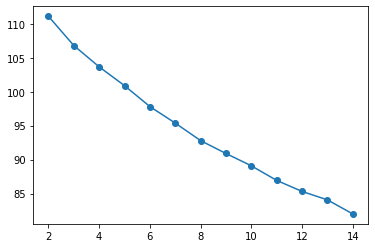

In [78]:
# Elbow Method
cluster_range= list(range(2,15))
inertias= []                # How far away the points within a cluster are. We look for small inertia values


#init: Initialization method of the centroids. Value will be: "k-means++". k-means++ selects initial cluster centers for k-means clustering in a smart way to speed up convergence.        

for c in cluster_range:
    k_means= KMeans(init= 'k-means++', n_clusters= c, n_init= 50, random_state= 1).fit(grouped_venues_clustering)                                                                                                                                             
    inertias.append(k_means.inertia_)

plt.figure()
plt.plot(cluster_range, inertias, marker= 'o')
plt.show()



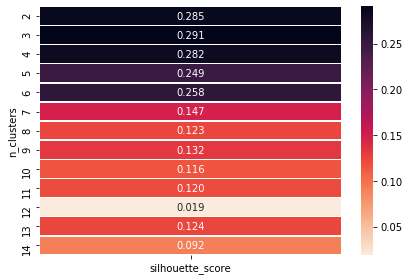

In [79]:
from sklearn.metrics import silhouette_samples,silhouette_score


cluster_range
sil_results= []
 
for c in cluster_range:
    clusterer= KMeans(init= 'k-means++', n_clusters= c, n_init= 50, random_state= 1)
    cluster_labels= clusterer.fit_predict(grouped_venues_clustering)
    sil_avg= silhouette_score(grouped_venues_clustering, cluster_labels)
    sil_results.append([c,sil_avg])


df_res= pd.DataFrame(sil_results, columns=['n_clusters', 'silhouette_score'])
pivot_km= pd.pivot_table(df_res, index= 'n_clusters', values= 'silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt= '.3f', cmap= sns.cm.rocket_r)
plt.tight_layout()

In [80]:

# set number of clusters
kclusters = 3



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Add clustering labels

In [88]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df2[['NAME', 'County', 'STATE', 'GEOID', 'POPESTIMATE2019', 'cases','LAT', 'LONG','Persons per Household']]
df_merged.rename(columns= {'NAME': 'City'}, inplace= True)

In [89]:
# merge data to add latitude/longitude for each 
df_merged = df_merged.merge(venues_sorted, on='City')

df_merged.head(3) # check the last columns!

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,West Allis city,Milwaukee County,WI,5585300,59890,79396.0,43.007186,-88.028986,2.17,0,Bar,Sandwich Place,Pub,Sports Bar,Steakhouse
1,Wauwatosa city,Milwaukee County,WI,5584675,48118,79396.0,43.063165,-88.035583,2.33,0,Locksmith,Park,Gym,Pool,Zoo Exhibit
2,Greenfield city,Milwaukee County,WI,5531175,37221,79396.0,42.960604,-88.005670,2.18,0,Italian Restaurant,Jewelry Store,Ice Cream Shop,Restaurant,Beer Bar


In [91]:
df_merged.shape

(404, 15)

# Clusters for georgraphical venues data

In [92]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['LAT'], df_merged['LONG'], df_merged['City'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [93]:
df_merged['Cluster Labels'].value_counts()

0    383
2     17
1      4
Name: Cluster Labels, dtype: int64

In [112]:
df_merged['Persons per Household']= df_merged['Persons per Household'].astype(float)
df_merged.dtypes

City                      object
County                    object
STATE                     object
GEOID                     object
POPESTIMATE2019            int64
cases                    float64
LAT                      float64
LONG                     float64
Persons per Household    float64
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

## Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


In [113]:
cols_list= ['cases','POPESTIMATE2019', 'Persons per Household', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue']

## Cluster 0

In [98]:
cluster_0= df_merged.loc[df_merged['Cluster Labels'] == 0]     
cluster_0.head()            


,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,West Allis city,Milwaukee County,WI,5585300,59890,79396.0,43.007186,-88.028986,2.17,0,Bar,Sandwich Place,Pub,Sports Bar,Steakhouse
1,Wauwatosa city,Milwaukee County,WI,5584675,48118,79396.0,43.063165,-88.035583,2.33,0,Locksmith,Park,Gym,Pool,Zoo Exhibit
2,Greenfield city,Milwaukee County,WI,5531175,37221,79396.0,42.960604,-88.005670,2.18,0,Italian Restaurant,Jewelry Store,Ice Cream Shop,Restaurant,Beer Bar
3,Oak Creek city,Milwaukee County,WI,5558800,36325,79396.0,42.880257,-87.900777,2.45,0,Trail,Country Dance Club,Gym,Park,Playground
4,Franklin city,Milwaukee County,WI,5527300,35811,79396.0,42.883879,-88.011548,2.44,0,Baseball Field,Gym,Bar,Coffee Shop,Football Stadium


In [116]:
cluster_0[cols_list].describe()


,cases,POPESTIMATE2019,Persons per Household
count,383.000000,3.830000e+02,383.000000
mean,57226.704961,8.889624e+04,2.666632
std,71867.170852,2.525666e+05,0.401376
min,9165.000000,5.080000e+03,1.970000
25%,23394.000000,1.437200e+04,2.380000
50%,40026.000000,3.052800e+04,2.570000
75%,61111.000000,7.883450e+04,2.885000
max,536258.000000,3.979576e+06,4.280000


In [118]:
cluster_0[cols_list].describe(include= object)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
count,383,383,383,383,383
unique,121,130,127,119,117
top,Pizza Place,Zoo Exhibit,Zoo Exhibit,Exhibit,Eye Doctor
freq,28,40,32,49,60


## Cluster 1

In [120]:
cluster_1= df_merged.loc[df_merged['Cluster Labels'] == 1]
cluster_1.head(4)

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
69,Helotes city,Bexar County,TX,4833146,9961,79363.0,29.577970,-98.680540,3.42,1,Construction & Landscaping,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor
344,Clearwater city,Pinellas County,FL,1212875,116946,46860.0,27.980289,-82.768166,2.37,1,Construction & Landscaping,Bar,Art Gallery,Zoo Exhibit,Fireworks Store
367,Temecula city,Riverside County,CA,0678120,114761,131822.0,33.493082,-117.131730,3.34,1,Construction & Landscaping,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor
381,Arvin city,Kern County,CA,0602924,21851,52002.0,35.194361,-118.830569,4.34,1,Construction & Landscaping,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor


In [121]:
cluster_1[cols_list].describe(include= object)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
count,4,4,4,4,4
unique,1,2,2,2,2
top,Construction & Landscaping,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor
freq,4,3,3,3,3


In [122]:
cluster_1[cols_list].describe()

,cases,POPESTIMATE2019,Persons per Household
count,4.000000,4.000000,4.000000
mean,77511.750000,65879.750000,3.367500
std,38915.753043,57915.386323,0.805041
min,46860.000000,9961.000000,2.370000
25%,50716.500000,18878.500000,3.097500
50%,65682.500000,68306.000000,3.380000
75%,92477.750000,115307.250000,3.650000
max,131822.000000,116946.000000,4.340000


## Cluster 2

In [126]:
cluster_2= df_merged.loc[df_merged['Cluster Labels'] == 2]
cluster_2.head(4)

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
21,Caledonia village,Racine County,WI,5511950,25277,16227.0,42.797411,-87.877405,2.49,2,Park,Event Service,Event Space,Exhibit,Eye Doctor
25,Little Chute village,Outagamie County,WI,5544950,12081,15189.0,44.291128,-88.320399,2.30,2,Park,Event Service,Event Space,Exhibit,Eye Doctor
33,Bristol village,Kenosha County,WI,5509800,5142,11304.0,42.532323,-88.009098,2.52,2,Park,Event Service,Event Space,Exhibit,Eye Doctor
45,Deer Park city,Harris County,TX,4819624,33474,210362.0,29.687279,-95.115897,3.03,2,Park,Basketball Court,Zoo Exhibit,Event Space,Eye Doctor


In [127]:
cluster_2[cols_list].describe()

,cases,POPESTIMATE2019,Persons per Household
count,17.000000,17.000000,17.000000
mean,68443.588235,60066.058824,2.658824
std,63521.130987,67605.807796,0.289501
min,11304.000000,5142.000000,2.300000
25%,17023.000000,20159.000000,2.440000
50%,46860.000000,34875.000000,2.530000
75%,111441.000000,62082.000000,2.870000
max,210362.000000,265351.000000,3.160000


In [125]:
cluster_2[cols_list].describe(include= object)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
count,17,17,17,17,17
unique,5,10,10,5,6
top,Park,Event Service,Event Space,Exhibit,Eye Doctor
freq,13,6,6,7,9


In [130]:
def top_venues(df, lst):
    in_names= []
    val= []
    for x in lst:
        y=df[x]     
        i= y.value_counts().index.tolist()[0]
        v= y.value_counts().tolist()[0]
        in_names.append(i)
        val.append(v)

    return in_names, val

In [132]:
# List of columns I want to use for bar chart

cols= cluster_0.columns[10:15]

# Top 5 venues per cluster, and df:
clus_0_Val=top_venues(cluster_0,cols)
clus_0Df=pd.DataFrame({'cluster_0_venues': clus_0_Val[0],'Values':clus_0_Val[1]})


clus_1_Val=top_venues(cluster_1,cols)
clus_1Df=pd.DataFrame({'cluster_1_venues': clus_1_Val[0],'Values':clus_1_Val[1]})


clus_2_Val=top_venues(cluster_2,cols)
clus_2Df=pd. DataFrame({'cluster_2_venues': clus_2_Val[0],'Values':clus_2_Val[1]})


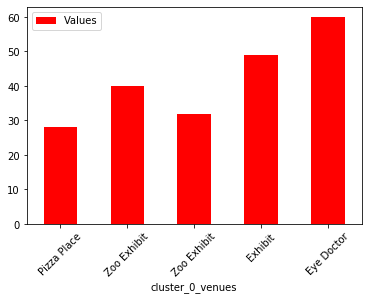

In [134]:
ax= clus_0Df.plot.bar(x= 'cluster_0_venues', y= 'Values', color='red', rot='45')

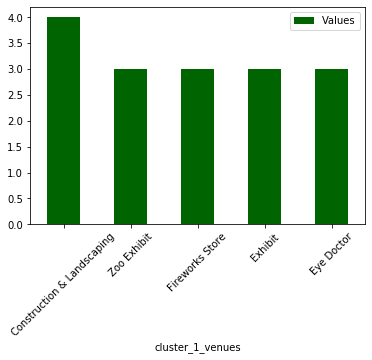

In [137]:
ax= clus_1Df.plot.bar(x= 'cluster_1_venues', y= 'Values', color='#006400', rot='45')

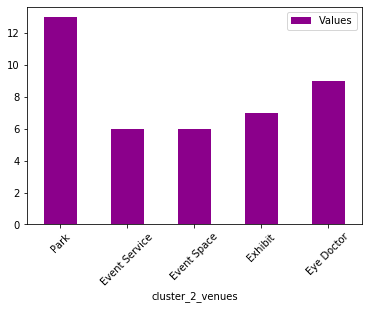

In [138]:
ax= clus_2Df.plot.bar(x= 'cluster_2_venues', y= 'Values', color='darkmagenta', rot='45')